In [40]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [41]:
# Load the dataset

In [42]:
advertising_data = pd.read_csv("/content/drive/MyDrive/advertising.csv")

In [43]:
# Explore the data

In [44]:
print(advertising_data.head(15))

       TV  Radio  Newspaper  Sales
0   230.1   37.8       69.2   22.1
1    44.5   39.3       45.1   10.4
2    17.2   45.9       69.3   12.0
3   151.5   41.3       58.5   16.5
4   180.8   10.8       58.4   17.9
5     8.7   48.9       75.0    7.2
6    57.5   32.8       23.5   11.8
7   120.2   19.6       11.6   13.2
8     8.6    2.1        1.0    4.8
9   199.8    2.6       21.2   15.6
10   66.1    5.8       24.2   12.6
11  214.7   24.0        4.0   17.4
12   23.8   35.1       65.9    9.2
13   97.5    7.6        7.2   13.7
14  204.1   32.9       46.0   19.0


In [45]:
print(advertising_data.shape)

(200, 4)


In [46]:
print(advertising_data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [47]:
print(advertising_data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [48]:
# Visualize data

In [49]:
sns.set()

<Axes: >

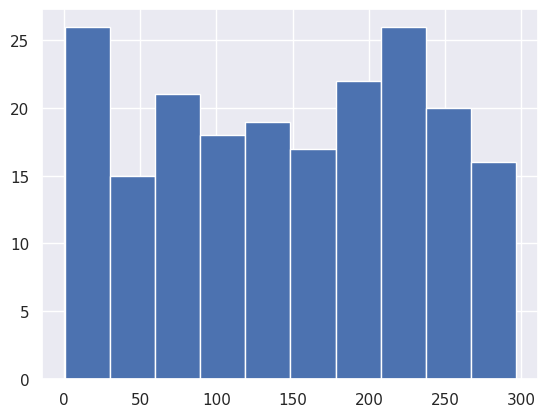

In [50]:
advertising_data['TV'].hist()

<Axes: >

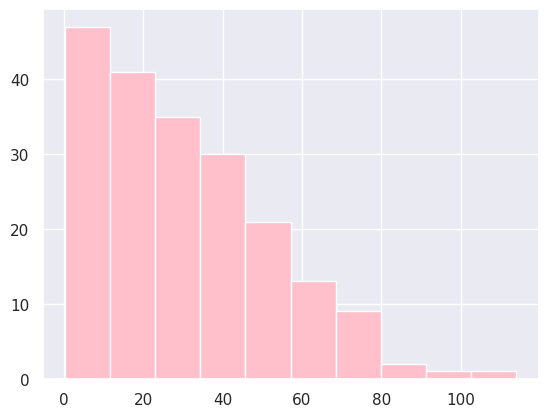

In [51]:
advertising_data['Newspaper'].hist(color='pink')

<Axes: >

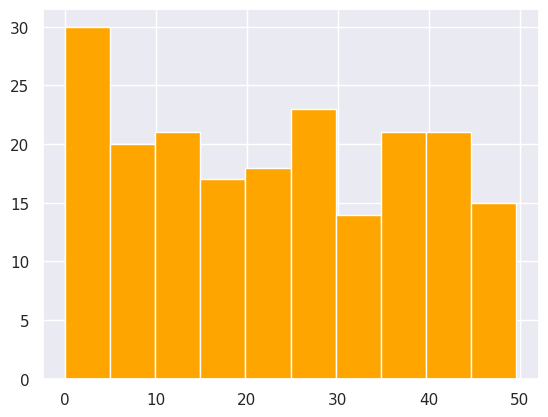

In [52]:
advertising_data['Radio'].hist(color='orange')

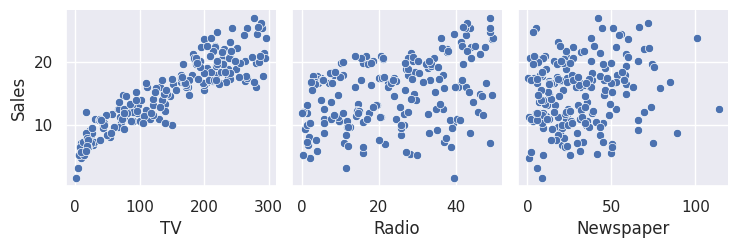

In [53]:
sns.pairplot(advertising_data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')

<Axes: >

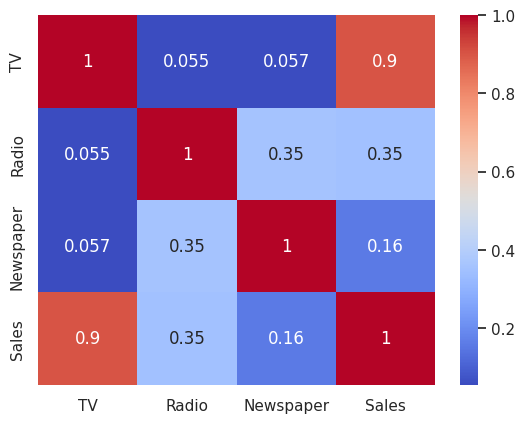

In [54]:
sns.heatmap(advertising_data.corr(), annot=True, cmap='coolwarm')

In [55]:
# Split data into features (X) and target variable (Y)

In [56]:
X = advertising_data.drop(columns='Sales')
Y = advertising_data['Sales']

In [57]:
# Split data into training and testing sets

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

In [59]:
# Create and train the model

In [60]:
sales_model = LinearRegression()
sales_model.fit(X_train, Y_train)

LinearRegression()

In [61]:
# Make predictions on the test set

In [62]:
sales_predictions = sales_model.predict(X_test)

In [63]:
# Visualize predictions vs actual sales

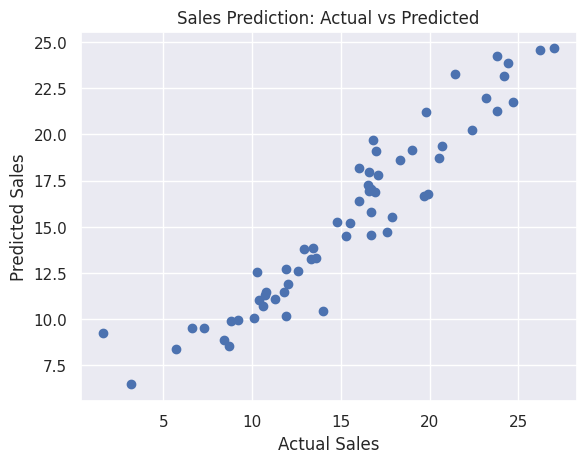

In [67]:
plt.scatter(Y_test, sales_predictions)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Sales Prediction: Actual vs Predicted')
plt.show()

In [68]:
# Evaluate the model using Mean Squared Error

In [69]:
mse = mean_squared_error(Y_test, sales_predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.626473038410332


In [70]:
# Evaluate the model using R-squared

In [71]:
r_squared = r2_score(Y_test, sales_predictions)
print(f'R-squared: {r_squared}')

R-squared: 0.8877675297095177


In [72]:
# Calculate an "accuracy-like" metric using R-squared

In [73]:
accuracy_like_metric = r_squared * 100
print(f'Accuracy-like Metric: {accuracy_like_metric}%')

Accuracy-like Metric: 88.77675297095176%
